<center><h1>INSAID - Consulting Capstone Project</h1></center>
<br/>
<center><h3>Project Submitted By</h3></center>
<center><h4>Group 1040</h4></center>
<center><h4>June 2019 Batch, INSAID</h4></center>

## 1. Introduction

__INSAID Telecom__, one of the leading telecom players, understands that customizing offering is very important for its business to stay competitive.

Currently, __INSAID Telecom__ is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India to help its clients better understand and interact with their audiences.

In this consulting project, we are expected to build a dashboard to understand user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties.

This analysis report will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.

## 2. Import the packages and data

### 2.1 Import the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 2.2 Import the dataset

In [2]:
gender_age_train_data = pd.read_csv("https://raw.githubusercontent.com/sunilkumarmano/Capstone-Project-1/master/gender_age_train.csv")
gender_age_train_data.head()

,Unnamed: 0,device_id,gender,age,age_group
0,0,-8076087639492063270,M,35,M32-38
1,1,-2897161552818060146,M,35,M32-38
2,2,-8260683887967679142,M,35,M32-38
3,3,-4938849341048082022,M,30,M29-31
4,4,245133531816851882,M,30,M29-31


In [3]:
phone_brand_device_model_data = pd.read_csv("https://raw.githubusercontent.com/sunilkumarmano/Capstone-Project-1/master/phone_brand_device_model.csv")
phone_brand_device_model_data.head()

,Unnamed: 0,device_id,brand,models_phone_brand
0,0,1877775838486905855,vivo,Y13
1,1,-3766087376657242966,小米,V183
2,2,-6238937574958215831,OPPO,R7s
3,3,8973197758510677470,三星,A368t
4,4,-2015528097870762664,小米,红米Note2


In [4]:
events_data = pd.read_csv("events_data.csv")
events_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi
1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi
2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi
3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi
4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi


## 3. Feature Engineering

### 3.1 Dropping the unwanted columns

#### 3.1.1 Dropping the autogenerated column from Gender Age Train table

In [5]:
gender_age_train_data.drop(labels = "Unnamed: 0", axis = 1, inplace = True)
gender_age_train_data.head()

,device_id,gender,age,age_group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


#### 3.1.2 Dropping the autogenerated column from Phone brand device model table

In [6]:
phone_brand_device_model_data.drop(labels = "Unnamed: 0", axis = 1, inplace = True)
phone_brand_device_model_data.head()

,device_id,brand,models_phone_brand
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


### 3.2 Mapping the Chinese brand names to English language

In [7]:
# create dictionary to map phone_brand symbols to English mapping

phone_brand_map = {'华为':'Huawei','小米':'Xiaomi','三星':'Samsung','vivo':'vivo','OPPO':'OPPO','魅族':'Meizu','酷派':'Coolpad','乐视':'LeEco','联想':'Lenovo','HTC':'HTC'}

phone_brand_map

{'华为': 'Huawei',
 '小米': 'Xiaomi',
 '三星': 'Samsung',
 'vivo': 'vivo',
 'OPPO': 'OPPO',
 '魅族': 'Meizu',
 '酷派': 'Coolpad',
 '乐视': 'LeEco',
 '联想': 'Lenovo',
 'HTC': 'HTC'}

In [8]:
# map phone_brand chinese name to English name

def getBrandValue(symbol):
    '''
    Function to get the Brand value based on symbol
    '''
    if symbol not in phone_brand_map:
        return symbol
    else:
        return phone_brand_map[symbol]

In [9]:
# apply the function to column

phone_brand_device_model_data['brand'] = phone_brand_device_model_data.apply(lambda x:getBrandValue(x['brand']),axis=1)

phone_brand_device_model_data.head()

,device_id,brand,models_phone_brand
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,Xiaomi,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,Samsung,A368t
4,-2015528097870762664,Xiaomi,红米Note2


### 3.3 Filtering the data based on the State of focus

In [10]:
filtered_events_data = events_data[(events_data.state == "MadhyaPradesh") | 
                                   (events_data.state == "Chhattisgarh") | 
                                   (events_data.state == "Uttaranchal") | 
                                   (events_data.state == "JammuandKashmir") | 
                                   (events_data.state == "Goa") | 
                                   (events_data.state == "Nagaland")
                                  ]
filtered_events_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
2197849,10117.0,-5.323073e+18,2016-05-01 11:11:24,75.939543,22.76917,Indore,MadhyaPradesh
2197850,112369.0,-5.323073e+18,2016-05-04 22:47:19,75.939543,22.76917,Indore,MadhyaPradesh
2197851,139098.0,-5.323073e+18,2016-05-01 09:55:58,75.939543,22.76917,Indore,MadhyaPradesh
2197852,190983.0,-5.323073e+18,2016-05-04 22:51:03,75.939543,22.76917,Indore,MadhyaPradesh
2197853,249507.0,-5.323073e+18,2016-05-01 11:24:12,75.939543,22.76917,Indore,MadhyaPradesh


### 3.4 Finding the missing values

In [11]:
gender_age_train_data.isnull().sum()

device_id    0
gender       0
age          0
age_group    0
dtype: int64

In [12]:
phone_brand_device_model_data.isnull().sum()

device_id             0
brand                 0
models_phone_brand    0
dtype: int64

In [13]:
filtered_events_data.isnull().sum()

event_id      0
device_id    51
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

__Observation:__

gender_age_train_data and phone_brand_device_model_data dataframes does not have any null values
Events data have null values in below list of columns.
 - device_id
 - longitude
 - latitude

### 3.5 Handling the missing values

As null values in the device_id column cannot be replaced with any other device id's we are dropping the records containing device_id columns as null values.

As null values in the latitude and longitude columns belog to the city - Indore and state-Madhyapradesh, we are replacing the latitude and longitude values of city - Indore and state - MadhyaPradesh for the records with null values.

#### 3.5.1 Dropping the rows with missing values in device_id column

In [14]:
filtered_events_data.dropna(how = "any", subset = ["device_id"], axis = 0, inplace = True)

filtered_events_data.device_id.isnull().sum()

C:\Users\vaithy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

#### 3.5.2 Replacing the null vaues in longitude and latitude columns

In [17]:
#Filtering the records that have missing values in latitude and longitude columns 

latitude_longitude_null_values = filtered_events_data[filtered_events_data.latitude.isnull()]
latitude_longitude_null_values

,event_id,device_id,timestamp,longitude,latitude,city,state
2209280,98473.0,2.350979e+18,2016-05-01 13:26:19,NaN,NaN,Indore,MadhyaPradesh
2209338,306267.0,2.350979e+18,2016-05-04 12:28:22,NaN,NaN,Indore,MadhyaPradesh
2209342,325499.0,2.350979e+18,2016-05-03 00:04:38,NaN,NaN,Indore,MadhyaPradesh
2209409,548071.0,2.350979e+18,2016-05-03 10:15:01,NaN,NaN,Indore,MadhyaPradesh
2209447,670642.0,2.350979e+18,2016-05-01 09:39:47,NaN,NaN,Indore,MadhyaPradesh
...,...,...,...,...,...,...,...
2231730,2338442.0,3.738280e+18,2016-05-03 13:38:44,NaN,NaN,Indore,MadhyaPradesh
2231772,2549252.0,3.738280e+18,2016-05-02 09:44:11,NaN,NaN,Indore,MadhyaPradesh
2231836,2843278.0,3.738280e+18,2016-05-01 01:08:00,NaN,NaN,Indore,MadhyaPradesh
2231892,3066955.0,3.738280e+18,2016-05-01 14:20:10,NaN,NaN,Indore,MadhyaPradesh


In [18]:
#Finding the unique device_id's of that has missing values in latitude and longitude columns

latitude_longitude_null_values.device_id.unique()

array([ 2.35097940e+18, -8.79056003e+18,  3.73828049e+18])

In [26]:
#Gathering the latitude and longitude values from historical data with same device_id's

#Gathering the longitude values
print(filtered_events_data.loc[(filtered_events_data.device_id == 2.3509794022024387e+18), "longitude"].unique())
print(filtered_events_data.loc[(filtered_events_data.device_id == -8.790560034584249e+18), "longitude"].unique())
print(filtered_events_data.loc[(filtered_events_data.device_id == 3.738280493453803e+18), "longitude"].unique())

#Gathering the latitude values
print(filtered_events_data.loc[(filtered_events_data.device_id == 2.3509794022024387e+18), "latitude"].unique())
print(filtered_events_data.loc[(filtered_events_data.device_id == -8.790560034584249e+18), "latitude"].unique())
print(filtered_events_data.loc[(filtered_events_data.device_id == 3.738280493453803e+18), "latitude"].unique())

[75.888474       nan]
[75.933778       nan]
[75.937988       nan]
[22.745063       nan]
[22.761965       nan]
[22.76201      nan]


In [27]:
#Replacing the missing values the with the historical data of latitude and longitude values

#Replacing the longitude values
filtered_events_data.loc[(filtered_events_data.device_id == 2.3509794022024387e+18), "longitude"] = 75.888474
filtered_events_data.loc[(filtered_events_data.device_id == -8.790560034584249e+18), "longitude"] = 75.933778
filtered_events_data.loc[(filtered_events_data.device_id == 3.738280493453803e+18), "longitude"] = 75.937988

#Replacing the latitude values
filtered_events_data.loc[(filtered_events_data.device_id == 2.3509794022024387e+18), "latitude"] = 22.745063000000002
filtered_events_data.loc[(filtered_events_data.device_id == -8.790560034584249e+18), "latitude"] = 22.761965
filtered_events_data.loc[(filtered_events_data.device_id == 3.738280493453803e+18), "latitude"] = 22.76201

C:\Users\vaithy\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [28]:
filtered_events_data.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### 3.6 Converting the negative device_id values to positive values

In [32]:
filtered_events_data["device_id"] = abs(filtered_events_data["device_id"])
filtered_events_data.head()

C:\Users\vaithy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,event_id,device_id,timestamp,longitude,latitude,city,state
2197849,10117.0,5.323073e+18,2016-05-01 11:11:24,75.939543,22.76917,Indore,MadhyaPradesh
2197850,112369.0,5.323073e+18,2016-05-04 22:47:19,75.939543,22.76917,Indore,MadhyaPradesh
2197851,139098.0,5.323073e+18,2016-05-01 09:55:58,75.939543,22.76917,Indore,MadhyaPradesh
2197852,190983.0,5.323073e+18,2016-05-04 22:51:03,75.939543,22.76917,Indore,MadhyaPradesh
2197853,249507.0,5.323073e+18,2016-05-01 11:24:12,75.939543,22.76917,Indore,MadhyaPradesh


In [33]:
phone_brand_device_model_data["device_id"] = abs(phone_brand_device_model_data["device_id"])
phone_brand_device_model_data.head()

,device_id,brand,models_phone_brand
0,1877775838486905855,vivo,Y13
1,3766087376657242966,Xiaomi,V183
2,6238937574958215831,OPPO,R7s
3,8973197758510677470,Samsung,A368t
4,2015528097870762664,Xiaomi,红米Note2


In [35]:
gender_age_train_data["device_id"] = abs(gender_age_train_data["device_id"])
gender_age_train_data.head()

,device_id,gender,age,age_group
0,8076087639492063270,M,35,M32-38
1,2897161552818060146,M,35,M32-38
2,8260683887967679142,M,35,M32-38
3,4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


## 4. Exploratory Data Analysis

### 4.1 Exploring the shape of the dataset

In [37]:
gender_age_train_data.shape

(74645, 4)

In [38]:
phone_brand_device_model_data.shape

(87726, 3)

In [39]:
filtered_events_data.shape

(261046, 7)

### 4.2 Exploring the datatypes of the dataset

In [40]:
gender_age_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
age_group    74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [41]:
phone_brand_device_model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id             87726 non-null int64
brand                 87726 non-null object
models_phone_brand    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [42]:
filtered_events_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261046 entries, 2197849 to 2458996
Data columns (total 7 columns):
event_id     261046 non-null float64
device_id    261046 non-null float64
timestamp    261046 non-null object
longitude    261046 non-null float64
latitude     261046 non-null float64
city         261046 non-null object
state        261046 non-null object
dtypes: float64(4), object(3)
memory usage: 15.9+ MB


### 4.3 Analyzing the data present in the dataset

#### 4.3.1 List of unique brands of mobiles present in the data

In [43]:
phone_brand_device_model_data.brand.unique()

array(['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', '联想 ', 'Huawei',
       '奇酷', 'Meizu', '斐讯', '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米',
       'ZUK', '努比亚', '惠普', '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视',
       'LeEco', '海信', '百立丰', '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯',
       '聆韵', 'TCL', '酷珀', '爱派尔', 'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼',
       '康佳', '优购', '邦华', '赛博宇华', '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚',
       '普耐尔', '糖葫芦', '亿通', '欧新', '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米',
       '米歌', 'E人E本', '西米', '大Q', '台电', '飞利浦', '唯米', '大显', '长虹', '维图',
       '青橙', '本为', '虾米', '夏新', '帷幄', '百加', 'SUGAR', '欧奇', '世纪星', '智镁',
       '欧比', '基伍', '飞秒', '德赛', '易派', '谷歌', '金星数码', '广信', '诺亚信', 'MIL',
       '白米', '大可乐', '宝捷讯', '优语', '首云', '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米',
       '凯利通', '唯比', '欧沃', '丰米', '恒宇丰', '奥克斯', '西门子', '欧乐迪', 'PPTV'],
      dtype=object)

#### 4.3.2 List of age groups present in the data

In [44]:
gender_age_train_data.age_group.unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

#### 4.3.3 List of cities present in the data

In [45]:
filtered_events_data.city.unique()

array(['Indore', 'Raghogarh', 'Sheopur', 'Madgaon', 'Sidhi', 'Sarni',
       'Betul', 'Pithoragarh', 'Sehore', 'Kashipur', 'DehraDun', 'Datia',
       'Rurki', 'Dabra', 'Guna', 'Rewa', 'Ratlam', 'Anantnag', 'Bhind',
       'Raipur', 'Itarsi', 'Dhar', 'Dewas', 'Wokha', 'Nagda', 'Mandidip',
       'Damoh', 'Kathua', 'Murwara', 'JabalpurCantonment', 'Gwalior',
       'Tikamgarh', 'Chhindwara', 'Jammu', 'Sopur', 'Udhampur',
       'Hoshangabad', 'Shahdol', 'Harda', 'Korba', 'DehraDunCantonment',
       'Raigarh', 'Haldwani', 'Jabalpur', 'Jagdalpur', 'Bilaspur',
       'Mormugao', 'Bhilai', 'Shivapuri', 'Nimach', 'Shajapur', 'Bhopal',
       'Chirmiri', 'Dimapur', 'Sagar', 'Baramula', 'Kohima',
       'Rajnandgaon', 'Morena', 'Chhatarpur', 'Ashoknagar', 'Seoni',
       'Singrauli', 'Rishikesh', 'Balaghat', 'Srinagar', 'Vidisha',
       'Jaora', 'Charoda', 'Mandsaur', 'Khandwa', 'Satna', 'Panaji',
       'Durg', 'Burhanpur', 'Basoda', 'Ambikapur', 'Khargone', 'Sendhwa',
       'Haridwar', 'G

#### 4.3.4 List of states present in the data

In [48]:
filtered_events_data.state.unique() #these states are our focus for consulting

array(['MadhyaPradesh', 'Goa', 'Uttaranchal', 'JammuandKashmir',
       'Chhattisgarh', 'Nagaland'], dtype=object)

## 5. Data Analysis and visualization

### 5.1 Distribution of Users(device_id) across States

In [56]:
distrtribution_of_users_across_states = pd.DataFrame(filtered_events_data.groupby("state")["device_id"].nunique())
dist_users_across_states = distrtribution_of_users_across_states.reset_index()
dist_users_across_states

,state,device_id
0,Chhattisgarh,400
1,Goa,76
2,JammuandKashmir,236
3,MadhyaPradesh,3220
4,Nagaland,107
5,Uttaranchal,258


<function matplotlib.pyplot.show(*args, **kw)>

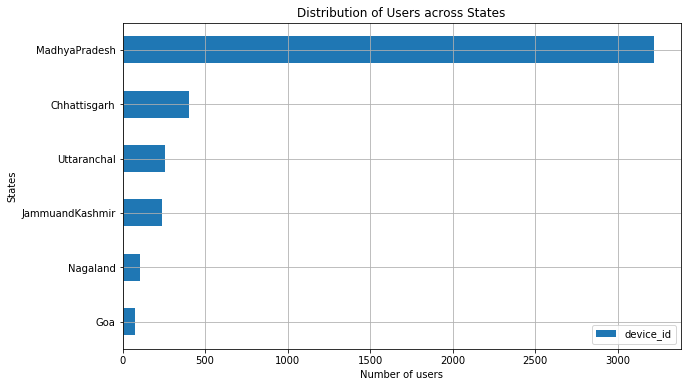

In [69]:
dist_users_across_states = dist_users_across_states.sort_values(by='device_id', ascending=True)
dist_users_across_states.plot("state", "device_id", kind = "barh", grid = True, figsize = (10,6))
plt.xlabel("Number of users")
plt.ylabel("States")
plt.title("Distribution of Users across States")
plt.show()

### 5.2 Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

In [64]:
distrtribution_of_users_across_phone_brands = pd.DataFrame(phone_brand_device_model_data.groupby("brand")["device_id"].nunique())
dist_users_across_phone_brands = distrtribution_of_users_across_phone_brands.reset_index()
dist_users_across_phone_brands

,brand,device_id
0,Coolpad,3979
1,E人E本,1
2,E派,13
3,HTC,1272
4,Huawei,15181
...,...,...
111,飞利浦,3
112,飞秒,2
113,首云,2
114,鲜米,2


In [65]:
# Sorting and Filtering top 10 phone brands for visualizing

sorted_dist_users_across_phone_brands = dist_users_across_phone_brands.sort_values("device_id", ascending = False)
top_10_sorted_dist_users_across_phone_brands = sorted_dist_users_across_phone_brands.head(10)
top_10_sorted_dist_users_across_phone_brands

,brand,device_id
16,Xiaomi,21645
14,Samsung,19211
4,Huawei,15181
18,vivo,7596
11,OPPO,6717
10,Meizu,5531
0,Coolpad,3979
3,HTC,1272
89,联想,982
7,LeEco,841


<function matplotlib.pyplot.show(*args, **kw)>

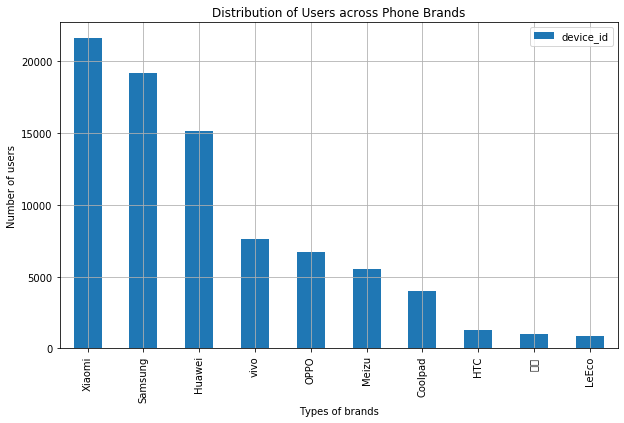

In [70]:
import warnings
warnings.filterwarnings("ignore")

top_10_sorted_dist_users_across_phone_brands.plot("brand","device_id", kind = "bar", grid = True, figsize = (10,6))
plt.xlabel("Types of brands")
plt.ylabel("Number of users")
plt.title("Distribution of Users across Phone Brands")
plt.show()

### 5.3 Distribution of Users across Gender

In [71]:
distribution_of_users_across_gender = pd.DataFrame(gender_age_train_data.groupby("gender")["device_id"].nunique())
dist_users_across_gender = distribution_of_users_across_gender.reset_index()
dist_users_across_gender

,gender,device_id
0,F,26741
1,M,47904


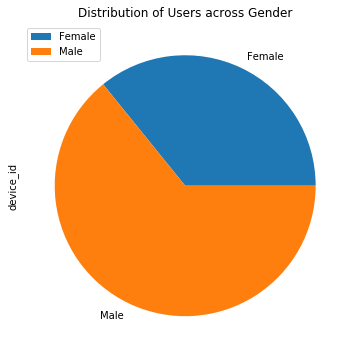

In [73]:
dist_users_across_gender.plot("gender", "device_id", kind = "pie", labels = ["Female","Male"], figsize = (10,6))
plt.title("Distribution of Users across Gender")
plt.show()

### 5.4 Distribution of Users across Age segments

In [74]:
distribution_of_users_across_age_segments = pd.DataFrame(gender_age_train_data.groupby("age_group")["device_id"].nunique())
dist_users_across_age_segments = distribution_of_users_across_age_segments.reset_index()
dist_users_across_age_segments

,age_group,device_id
0,F23-,5050
1,F24-26,4190
2,F27-28,3118
3,F29-32,4628
4,F33-42,5561
5,F43+,4194
6,M22-,7488
7,M23-26,9605
8,M27-28,5445
9,M29-31,7309


#### 5.4.1 Distribution of female users across age segments

In [75]:
female_dist_users_across_age_segments = dist_users_across_age_segments.iloc[:6,:]
female_dist_users_across_age_segments

,age_group,device_id
0,F23-,5050
1,F24-26,4190
2,F27-28,3118
3,F29-32,4628
4,F33-42,5561
5,F43+,4194


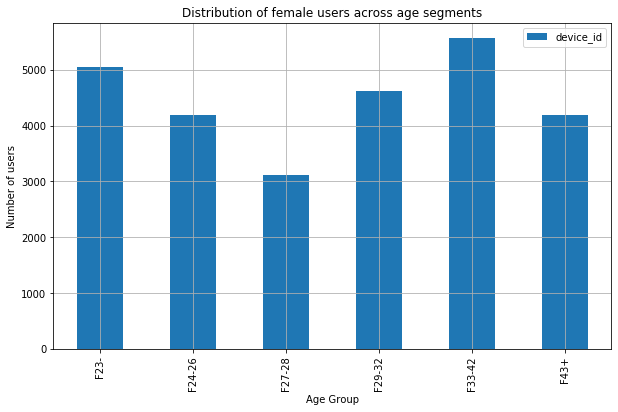

In [76]:
female_dist_users_across_age_segments.plot("age_group", "device_id", kind = "bar", grid = True, figsize = (10,6))
plt.xlabel("Age Group")
plt.ylabel("Number of users")
plt.title("Distribution of female users across age segments")
plt.show()

#### 5.4.2 Distribution of male users across age segments

In [77]:
male_dist_users_across_age_segments = dist_users_across_age_segments.iloc[6:,:]
male_dist_users_across_age_segments

,age_group,device_id
6,M22-,7488
7,M23-26,9605
8,M27-28,5445
9,M29-31,7309
10,M32-38,9476
11,M39+,8581


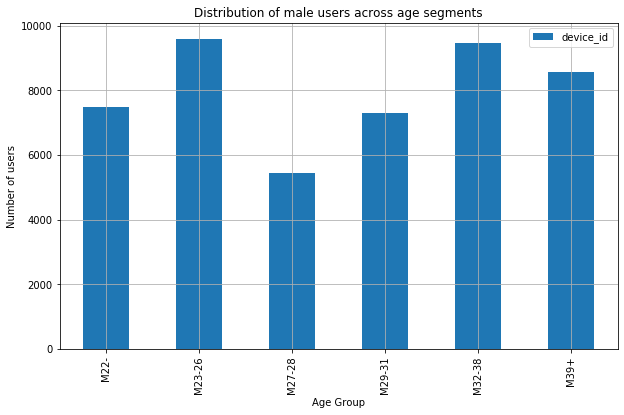

In [78]:
male_dist_users_across_age_segments.plot("age_group", "device_id", kind = "bar", grid = True, figsize = (10,6))
plt.xlabel("Age Group")
plt.ylabel("Number of users")
plt.title("Distribution of male users across age segments")
plt.show()